<a href="https://colab.research.google.com/github/JorgeZarama/TFM-final-models/blob/main/Target_close_Test_de_Stock_Market_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importar Librería

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dense, Attention, Layer, Input, Dropout, concatenate
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from keras.callbacks import EarlyStopping
from sklearn import preprocessing
from tensorflow.keras.optimizers import Adam


Extracción de Datos


In [2]:
# 1. Extracción de datos
symbol = 'GOOGL'
df = yf.download(symbol, start='2004-08-19', end='2024-09-20', interval='1d')# oja que carga hasta el 19 de 09 de 2024
df.reset_index(inplace=True)
df['Date'] = pd.to_datetime(df['Date'])


[*********************100%%**********************]  1 of 1 completed


In [3]:
display(df.describe(include='all'))
display(df.info())
print(df.head())
print(df.tail())

C:\Users\jorge\AppData\Local\Temp\ipykernel_33284\2022887244.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  display(df.describe(include='all'))


,Date,Open,High,Low,Close,Adj Close,Volume
count,5056,5056.000000,5056.000000,5056.000000,5056.000000,5056.000000,5.056000e+03
unique,5056,NaN,NaN,NaN,NaN,NaN,NaN
top,2004-08-19 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
first,2004-08-19 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,2024-09-19 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,46.127009,46.610178,45.650578,46.140126,46.029264,1.168503e+08
std,NaN,43.904672,44.387371,43.453038,43.927588,43.827804,1.475820e+08
min,NaN,2.482232,2.546046,2.401401,2.502753,2.496571,9.312000e+06
25%,NaN,13.136449,13.237800,12.983233,13.139139,13.106685,3.089300e+07


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5056 entries, 0 to 5055
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5056 non-null   datetime64[ns]
 1   Open       5056 non-null   float64       
 2   High       5056 non-null   float64       
 3   Low        5056 non-null   float64       
 4   Close      5056 non-null   float64       
 5   Adj Close  5056 non-null   float64       
 6   Volume     5056 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 276.6 KB


None

        Date      Open      High       Low     Close  Adj Close     Volume
0 2004-08-19  2.502503  2.604104  2.401401  2.511011   2.504808  893181924
1 2004-08-20  2.527778  2.729730  2.515015  2.710460   2.703765  456686856
2 2004-08-23  2.771522  2.839840  2.728979  2.737738   2.730976  365122512
3 2004-08-24  2.783784  2.792793  2.591842  2.624374   2.617892  304946748
4 2004-08-25  2.626627  2.702703  2.599600  2.652653   2.646101  183772044
           Date        Open        High         Low       Close   Adj Close  \
5051 2024-09-13  155.429993  158.380005  155.210007  157.460007  157.460007   
5052 2024-09-16  157.309998  158.250000  156.600006  158.059998  158.059998   
5053 2024-09-17  159.020004  160.550003  158.380005  159.320007  159.320007   
5054 2024-09-18  159.860001  160.500000  158.600006  159.809998  159.809998   
5055 2024-09-19  163.710007  163.789993  161.339996  162.139999  162.139999   

        Volume  
5051  29591200  
5052  18379800  
5053  20715600  
5054  2

Revisar la Data

Gráficamos el valor de la acción (precio de cierre)

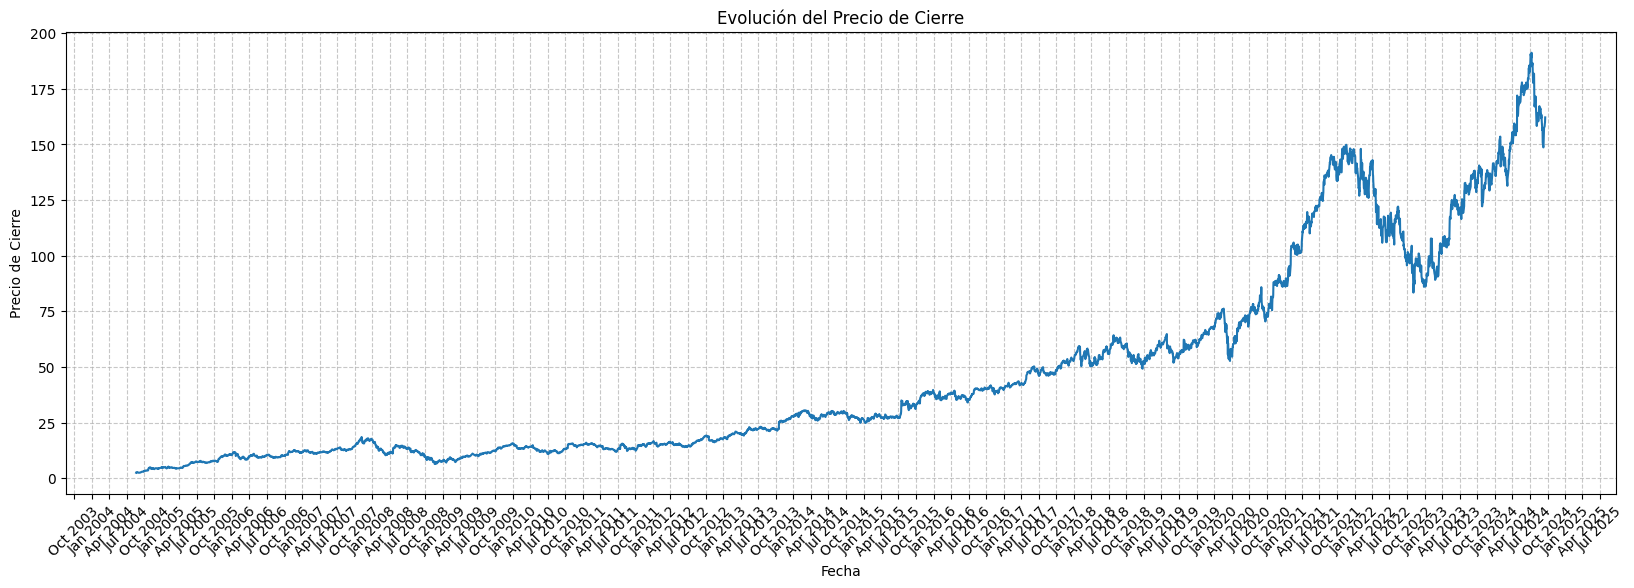

In [4]:
# Filtrar los datos por el rango de fechas

#df_filtrado = df[(df['Date'] >= '2004-08-20') & (df['Date'] <= '2024-07-31')]

# Crear el gráfico de línea
plt.figure(figsize=(20, 6))
sns.lineplot(x='Date', y='Close', data=df)

# Personalizar el eje x para mostrar meses y años
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)

# Agregar título y etiquetas a los ejes
plt.title('Evolución del Precio de Cierre')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')

# Agregar una cuadrícula para facilitar la lectura
plt.grid(True, linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()

Seleccionar las características y la variable objetivo

In [5]:
##Escalado de Datos 
close_prices = df['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
close_prices_scaled = scaler.fit_transform(close_prices)


In [6]:
#Función para crear las secuencias temporales 

def create_lstm_data(data, time_steps):
  x, y = [], []
  for i in range(len(data) - time_steps): #removed extra indent
    x.append(data[i:(i + time_steps), 0]) #indented correctly
    y.append(data[i + time_steps, 0]) #indented correctly
  return np.array(x), np.array(y)

##para time step = 2 y np [[1],[2],[3],[4]]
##[1,2][3]  and [2,3][4] 

## LSTM Model 2 capas 50 unidaes

In [32]:
time_steps = 256
x_total, y_total = create_lstm_data(close_prices_scaled, time_steps)

dis = int(len(x_total) * 0.95)
display(dis)
x_train, x_test = x_total[:dis], x_total[dis:]
y_train, y_test = y_total[:dis], y_total[dis:]

x = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mean_absolute_error'])
history = model.fit(x, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))

4560

Epoch 1/50


C:\Python\Python39\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


143/143 ━━━━━━━━━━━━━━━━━━━━ 15s 90ms/step - loss: 0.0083 - mean_absolute_error: 0.0442 - val_loss: 0.0012 - val_mean_absolute_error: 0.0260
Epoch 2/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 13s 88ms/step - loss: 1.9492e-04 - mean_absolute_error: 0.0083 - val_loss: 0.0010 - val_mean_absolute_error: 0.0261
Epoch 3/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 13s 88ms/step - loss: 1.8509e-04 - mean_absolute_error: 0.0084 - val_loss: 0.0010 - val_mean_absolute_error: 0.0243
Epoch 4/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 13s 89ms/step - loss: 1.7900e-04 - mean_absolute_error: 0.0080 - val_loss: 9.6134e-04 - val_mean_absolute_error: 0.0257
Epoch 5/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 13s 89ms/step - loss: 1.4339e-04 - mean_absolute_error: 0.0073 - val_loss: 0.0011 - val_mean_absolute_error: 0.0285
Epoch 6/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 13s 94ms/step - loss: 1.3598e-04 - mean_absolute_error: 0.0071 - val_loss: 9.4454e-04 - val_mean_absolute_error: 0.0260
Epoch 7/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 13s 94ms/step - loss: 1.3601e-0

143/143 ━━━━━━━━━━━━━━━━━━━━ 14s 101ms/step - loss: 3.7123e-05 - mean_absolute_error: 0.0037 - val_loss: 3.0200e-04 - val_mean_absolute_error: 0.0135
Epoch 44/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 15s 102ms/step - loss: 4.0581e-05 - mean_absolute_error: 0.0038 - val_loss: 2.3460e-04 - val_mean_absolute_error: 0.0104
Epoch 45/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 14s 101ms/step - loss: 5.7710e-05 - mean_absolute_error: 0.0048 - val_loss: 2.2923e-04 - val_mean_absolute_error: 0.0110
Epoch 46/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 15s 102ms/step - loss: 4.5520e-05 - mean_absolute_error: 0.0042 - val_loss: 2.9655e-04 - val_mean_absolute_error: 0.0132
Epoch 47/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 15s 102ms/step - loss: 3.9404e-05 - mean_absolute_error: 0.0037 - val_loss: 2.1345e-04 - val_mean_absolute_error: 0.0102
Epoch 48/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 14s 101ms/step - loss: 4.2362e-05 - mean_absolute_error: 0.0041 - val_loss: 2.1193e-04 - val_mean_absolute_error: 0.0100
Epoch 49/50
143/143 ━━━━━━━━━━━━━━━━━━━━

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 4.4785e-04 - mean_absolute_error: 0.0176
perdidas de test [0.0005333987646736205, 0.019599562510848045]
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step
Test Loss (MSE): [0.0005333987646736205, 0.019599562510848045]
Mean Absolute Error (MAE): 3.69799378712972
Mean Squared Error (MSE): 18.988534290641347
Root Mean Squared Error (RMSE): 4.357583537999168
R-squared (R²): 0.9362983198842547


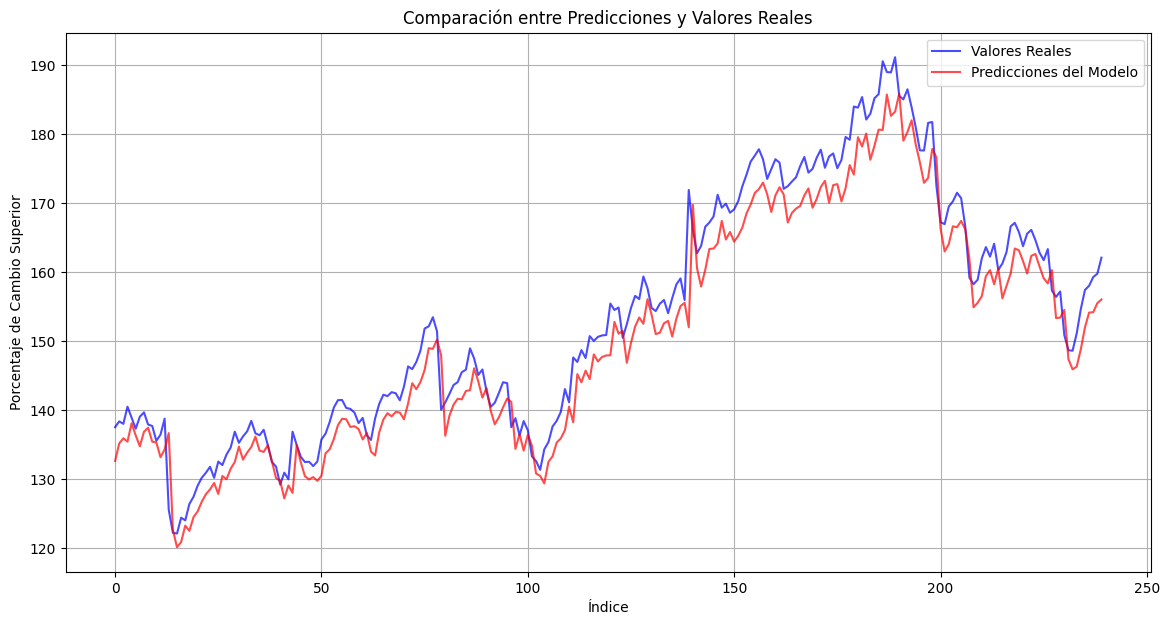

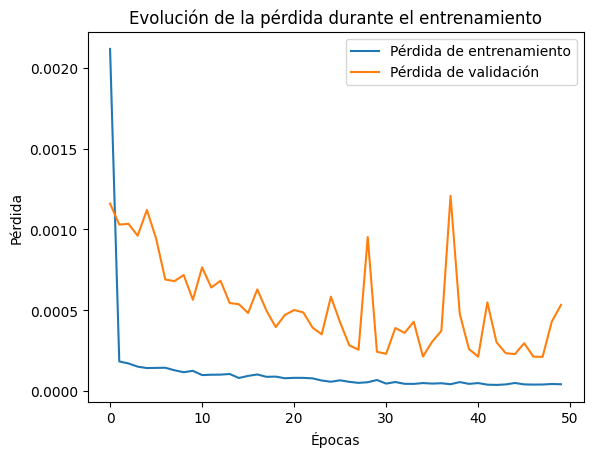

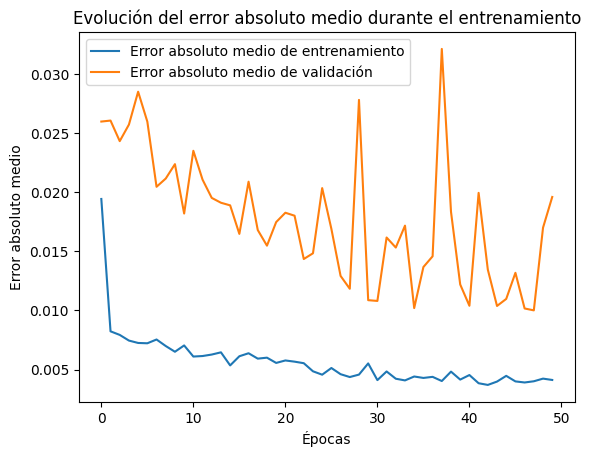

In [33]:
# Evaluar el modelo en el conjunto de prueba
test_loss = model.evaluate(x_test, y_test)
print("perdidas de test", test_loss)
# Predicción
predictions = model.predict(x_test)

# Desescalar las predicciones
predictions = scaler.inverse_transform(predictions)

#Reshape y_test to be a 2D array before inverse_transform
y_test = y_test.reshape(-1, 1)

y_test = scaler.inverse_transform(y_test)

# Calcular métricas adicionales
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

# Mostrar las métricas
print(f"Test Loss (MSE): {test_loss}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

# Crear el gráfico
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='Valores Reales', color='blue', alpha=0.7)
plt.plot(predictions, label='Predicciones del Modelo', color='red', alpha=0.7)
plt.xlabel('Índice')
plt.ylabel('Porcentaje de Cambio Superior')
plt.title('Comparación entre Predicciones y Valores Reales')
plt.legend()
plt.grid(True)
plt.show()

# Graficar la pérdida (loss)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Evolución de la pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Graficar el error absoluto medio (mean_absolute_error)
plt.plot(history.history['mean_absolute_error'], label='Error absoluto medio de entrenamiento')
plt.plot(history.history['val_mean_absolute_error'], label='Error absoluto medio de validación')
plt.title('Evolución del error absoluto medio durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Error absoluto medio')
plt.legend()
plt.show()

In [34]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_15 (LSTM)                       │ (None, 256, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_16 (LSTM)                       │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 91,955 (359.20 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 61,304 (239.47 KB)

## LSTM Model 2 capas 50 unidaes + capa Densa 25

In [35]:
time_steps = 256
x_total, y_total = create_lstm_data(close_prices_scaled, time_steps)

dis = int(len(x_total) * 0.95)
display(dis)
x_train, x_test = x_total[:dis], x_total[dis:]
y_train, y_test = y_total[:dis], y_total[dis:]

x = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mean_absolute_error'])
history = model.fit(x, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))

4560

Epoch 1/50


C:\Python\Python39\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


143/143 ━━━━━━━━━━━━━━━━━━━━ 17s 104ms/step - loss: 0.0115 - mean_absolute_error: 0.0552 - val_loss: 0.0015 - val_mean_absolute_error: 0.0331
Epoch 2/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 15s 102ms/step - loss: 1.6469e-04 - mean_absolute_error: 0.0076 - val_loss: 0.0010 - val_mean_absolute_error: 0.0268
Epoch 3/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 15s 102ms/step - loss: 1.5085e-04 - mean_absolute_error: 0.0075 - val_loss: 9.9703e-04 - val_mean_absolute_error: 0.0264
Epoch 4/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 14s 101ms/step - loss: 1.2464e-04 - mean_absolute_error: 0.0067 - val_loss: 0.0011 - val_mean_absolute_error: 0.0250
Epoch 5/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 15s 106ms/step - loss: 1.6681e-04 - mean_absolute_error: 0.0080 - val_loss: 9.3186e-04 - val_mean_absolute_error: 0.0258
Epoch 6/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 15s 107ms/step - loss: 1.1777e-04 - mean_absolute_error: 0.0065 - val_loss: 9.9022e-04 - val_mean_absolute_error: 0.0270
Epoch 7/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 15s 102ms/step - loss

143/143 ━━━━━━━━━━━━━━━━━━━━ 15s 106ms/step - loss: 4.0814e-05 - mean_absolute_error: 0.0040 - val_loss: 2.2953e-04 - val_mean_absolute_error: 0.0104
Epoch 44/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 15s 106ms/step - loss: 4.9347e-05 - mean_absolute_error: 0.0044 - val_loss: 4.1496e-04 - val_mean_absolute_error: 0.0166
Epoch 45/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 15s 103ms/step - loss: 5.2397e-05 - mean_absolute_error: 0.0049 - val_loss: 2.8836e-04 - val_mean_absolute_error: 0.0129
Epoch 46/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 15s 106ms/step - loss: 5.3301e-05 - mean_absolute_error: 0.0047 - val_loss: 2.9956e-04 - val_mean_absolute_error: 0.0132
Epoch 47/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 15s 104ms/step - loss: 4.2974e-05 - mean_absolute_error: 0.0042 - val_loss: 2.2324e-04 - val_mean_absolute_error: 0.0106
Epoch 48/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 15s 103ms/step - loss: 5.0469e-05 - mean_absolute_error: 0.0047 - val_loss: 3.2725e-04 - val_mean_absolute_error: 0.0132
Epoch 49/50
143/143 ━━━━━━━━━━━━━━━━━━━━

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 3.0227e-04 - mean_absolute_error: 0.0132
perdidas de test [0.0003719377564266324, 0.015291458927094936]
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step
Test Loss (MSE): [0.0003719377564266324, 0.015291458927094936]
Mean Absolute Error (MAE): 2.885152308146159
Mean Squared Error (MSE): 13.240663994021206
Root Mean Squared Error (RMSE): 3.6387723196184187
R-squared (R²): 0.9555809558885802


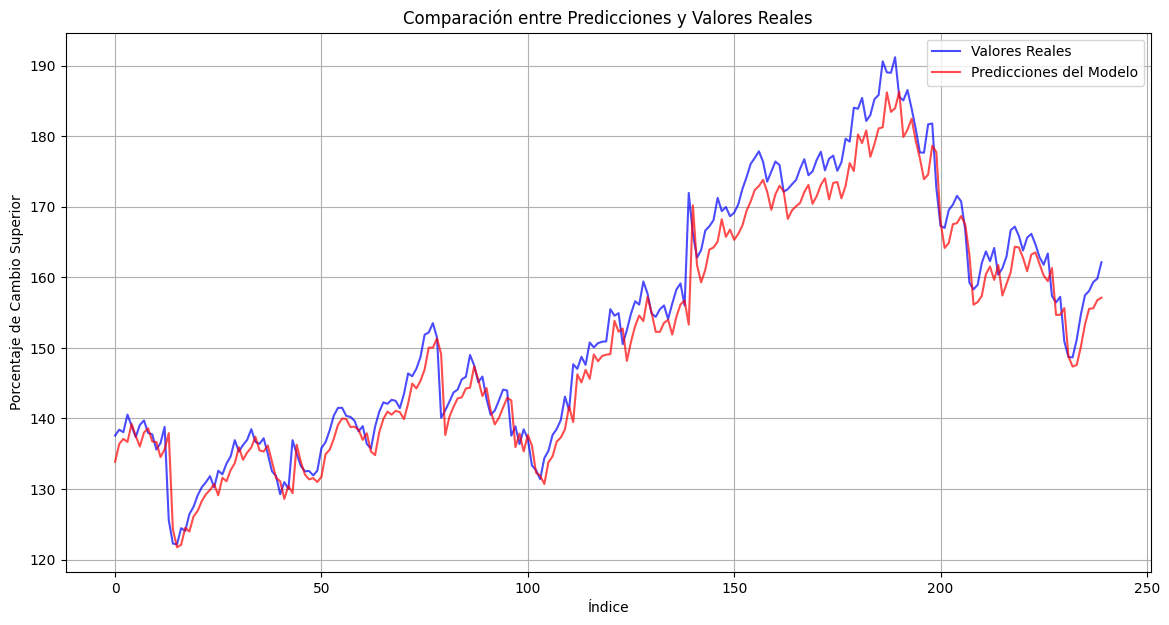

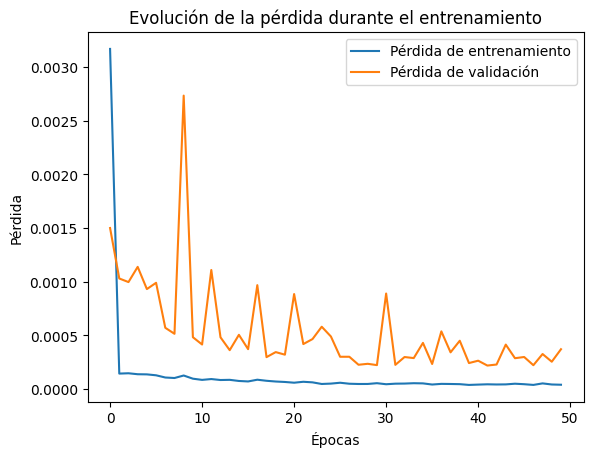

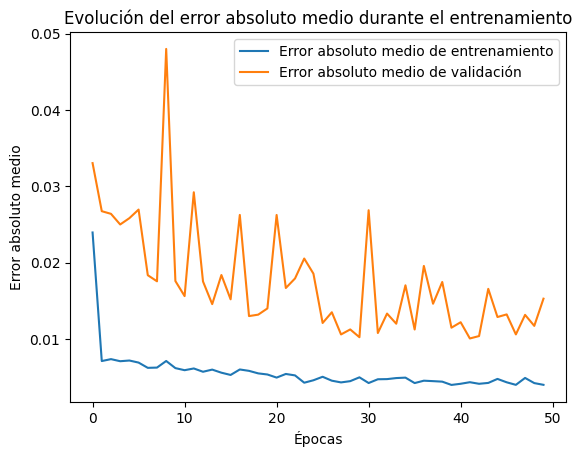

In [36]:
# Evaluar el modelo en el conjunto de prueba
test_loss = model.evaluate(x_test, y_test)
print("perdidas de test", test_loss)
# Predicción
predictions = model.predict(x_test)

# Desescalar las predicciones
predictions = scaler.inverse_transform(predictions)

#Reshape y_test to be a 2D array before inverse_transform
y_test = y_test.reshape(-1, 1)

y_test = scaler.inverse_transform(y_test)

# Calcular métricas adicionales
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

# Mostrar las métricas
print(f"Test Loss (MSE): {test_loss}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

# Crear el gráfico
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='Valores Reales', color='blue', alpha=0.7)
plt.plot(predictions, label='Predicciones del Modelo', color='red', alpha=0.7)
plt.xlabel('Índice')
plt.ylabel('Porcentaje de Cambio Superior')
plt.title('Comparación entre Predicciones y Valores Reales')
plt.legend()
plt.grid(True)
plt.show()

# Graficar la pérdida (loss)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Evolución de la pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Graficar el error absoluto medio (mean_absolute_error)
plt.plot(history.history['mean_absolute_error'], label='Error absoluto medio de entrenamiento')
plt.plot(history.history['val_mean_absolute_error'], label='Error absoluto medio de validación')
plt.title('Evolución del error absoluto medio durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Error absoluto medio')
plt.legend()
plt.show()

In [37]:
model.summary()


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_17 (LSTM)                       │ (None, 256, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_18 (LSTM)                       │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 95,705 (373.85 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 63,804 (249.24 KB)

## CNN 64 filter + LSTM Model 2 capas 50 unidaes + capa Densa 25

In [38]:
from tensorflow.keras.layers import LSTM, Conv1D, MaxPooling1D, Dense
# Crear las secuencias temporales
time_steps = 256
x_total, y_total = create_lstm_data(close_prices_scaled, time_steps)

# Dividir en conjunto de entrenamiento y prueba
dis = int(len(x_total) * 0.95)
x_train, x_test = x_total[:dis], x_total[dis:]
y_train, y_test = y_total[:dis], y_total[dis:]

# Redimensionar los datos para que sean compatibles con Conv1D y LSTM
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Definir el modelo con una capa Conv1D como entrada
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compilar el modelo con el optimizador 'adam', la pérdida 'mean_squared_error' y la métrica 'mean_absolute_error'
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Entrenar el modelo
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))



Epoch 1/50


C:\Python\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


143/143 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - loss: 0.0061 - mean_absolute_error: 0.0436 - val_loss: 0.0040 - val_mean_absolute_error: 0.0535
Epoch 2/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - loss: 3.1972e-04 - mean_absolute_error: 0.0110 - val_loss: 0.0020 - val_mean_absolute_error: 0.0369
Epoch 3/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - loss: 2.6822e-04 - mean_absolute_error: 0.0099 - val_loss: 0.0058 - val_mean_absolute_error: 0.0680
Epoch 4/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - loss: 2.9662e-04 - mean_absolute_error: 0.0109 - val_loss: 0.0013 - val_mean_absolute_error: 0.0294
Epoch 5/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - loss: 2.5625e-04 - mean_absolute_error: 0.0097 - val_loss: 0.0023 - val_mean_absolute_error: 0.0418
Epoch 6/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - loss: 2.0980e-04 - mean_absolute_error: 0.0090 - val_loss: 0.0028 - val_mean_absolute_error: 0.0467
Epoch 7/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - loss: 2.5234e-04 - mean_absol

143/143 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - loss: 5.5527e-05 - mean_absolute_error: 0.0046 - val_loss: 5.5651e-04 - val_mean_absolute_error: 0.0194
Epoch 44/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - loss: 5.2416e-05 - mean_absolute_error: 0.0046 - val_loss: 3.5561e-04 - val_mean_absolute_error: 0.0140
Epoch 45/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - loss: 5.5955e-05 - mean_absolute_error: 0.0047 - val_loss: 3.4657e-04 - val_mean_absolute_error: 0.0138
Epoch 46/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 8s 58ms/step - loss: 4.9831e-05 - mean_absolute_error: 0.0042 - val_loss: 3.2837e-04 - val_mean_absolute_error: 0.0129
Epoch 47/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 8s 58ms/step - loss: 5.5917e-05 - mean_absolute_error: 0.0046 - val_loss: 4.7966e-04 - val_mean_absolute_error: 0.0175
Epoch 48/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 5.7418e-05 - mean_absolute_error: 0.0050 - val_loss: 7.2222e-04 - val_mean_absolute_error: 0.0229
Epoch 49/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/ste

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3.1776e-04 - mean_absolute_error: 0.0130
perdidas de test [0.0003609078994486481, 0.01447428110986948]
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step
Test Loss (MSE): [0.0003609078994486481, 0.01447428110986948]
Mean Absolute Error (MAE): 2.730969270070394
Mean Squared Error (MSE): 12.84800645107534
Root Mean Squared Error (RMSE): 3.584411590634555
R-squared (R²): 0.9568982216034015


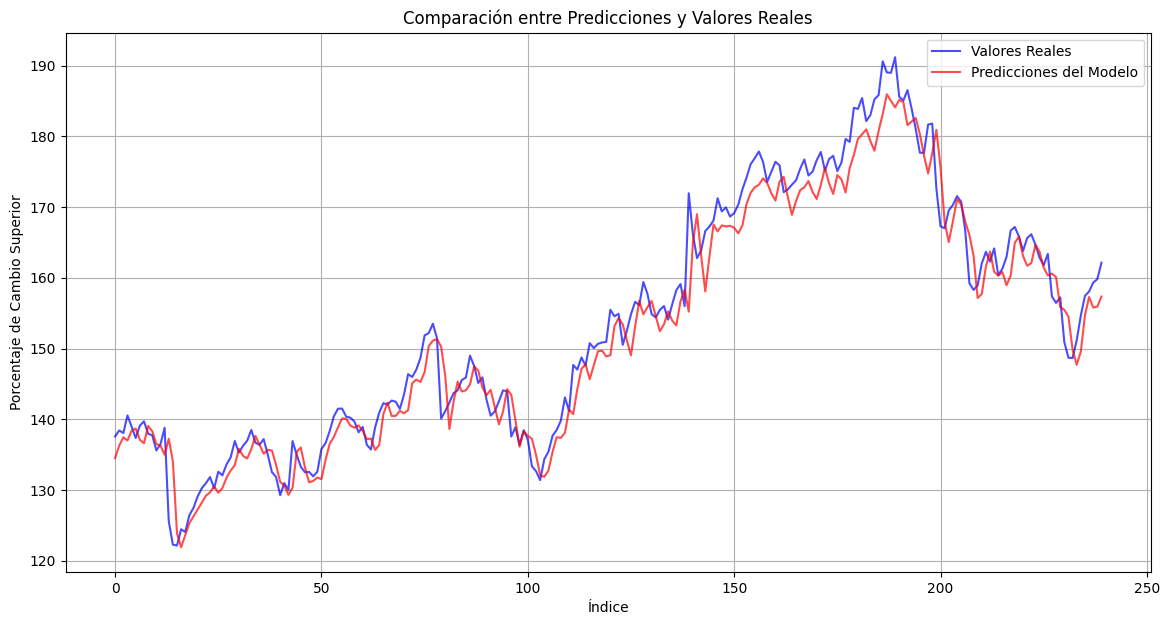

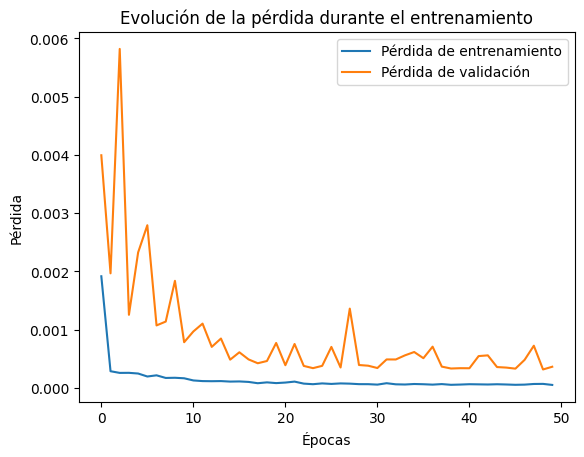

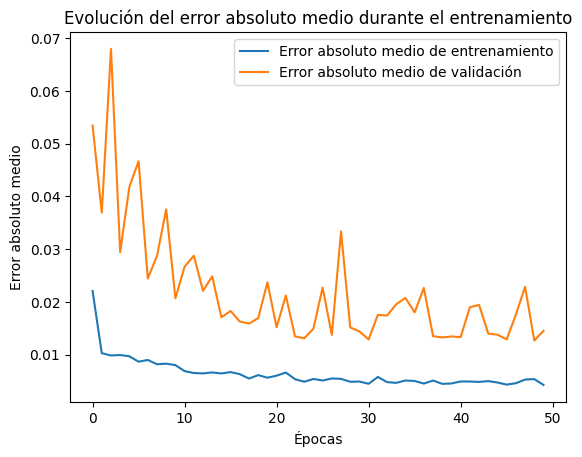

In [39]:
# Evaluar el modelo en el conjunto de prueba
test_loss = model.evaluate(x_test, y_test)
print("perdidas de test", test_loss)
# Predicción
predictions = model.predict(x_test)

# Desescalar las predicciones
predictions = scaler.inverse_transform(predictions)

#Reshape y_test to be a 2D array before inverse_transform
y_test = y_test.reshape(-1, 1)

y_test = scaler.inverse_transform(y_test)

# Calcular métricas adicionales
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

# Mostrar las métricas
print(f"Test Loss (MSE): {test_loss}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

# Crear el gráfico
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='Valores Reales', color='blue', alpha=0.7)
plt.plot(predictions, label='Predicciones del Modelo', color='red', alpha=0.7)
plt.xlabel('Índice')
plt.ylabel('Porcentaje de Cambio Superior')
plt.title('Comparación entre Predicciones y Valores Reales')
plt.legend()
plt.grid(True)
plt.show()

# Graficar la pérdida (loss)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Evolución de la pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Graficar el error absoluto medio (mean_absolute_error)
plt.plot(history.history['mean_absolute_error'], label='Error absoluto medio de entrenamiento')
plt.plot(history.history['val_mean_absolute_error'], label='Error absoluto medio de validación')
plt.title('Evolución del error absoluto medio durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Error absoluto medio')
plt.legend()
plt.show()

In [40]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_5 (Conv1D)                    │ (None, 254, 64)             │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 127, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_19 (LSTM)                       │ (None, 127, 50)             │          23,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_20 (LSTM)                       │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 130,523 (509.86 KB)

 Trainable params: 43,507 (169.95 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 87,016 (339.91 KB)

## CNN 32 filter + LSTM Model 64 unidaes

In [41]:
#import pickle5 as pickle
from tqdm import tqdm as tqdm
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, LSTM, Conv1D
from tensorflow.keras.layers import Flatten, Activation, BatchNormalization
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from tensorflow.keras import activations
import random
import time
# Crear las secuencias temporales
time_steps = 256
x_total, y_total = create_lstm_data(close_prices_scaled, time_steps)

# Dividir en conjunto de entrenamiento y prueba
dis = int(len(x_total) * 0.95)
x_train, x_test = x_total[:dis], x_total[dis:]
y_train, y_test = y_total[:dis], y_total[dis:]

# Redimensionar los datos para que sean compatibles con Conv1D y LSTM
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

FILTERS=32
# Definir el modelo con una capa Conv1D como entrada
model = Sequential()
model.add(Conv1D(filters=FILTERS, kernel_size=1, activation='swish', padding='same'))
model.add(Reshape((time_steps, FILTERS)))
model.add(LSTM(units=64, activation='swish'))
model.add(Dense(units=1, activation='swish'))
optim = tf.keras.optimizers.Adam(learning_rate=0.01, decay = 1e-5)



# Compilar el modelo con el optimizador 'adam', la pérdida 'mean_squared_error' y la métrica 'mean_absolute_error'

model.compile(loss='mae', optimizer=optim, metrics=['mae'])
# Entrenar el modelo
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))




Epoch 1/50


C:\Python\Python39\lib\site-packages\keras\src\optimizers\base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


143/143 ━━━━━━━━━━━━━━━━━━━━ 15s 94ms/step - loss: 0.0563 - mae: 0.0563 - val_loss: 0.0152 - val_mae: 0.0152
Epoch 2/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 14s 96ms/step - loss: 0.0064 - mae: 0.0064 - val_loss: 0.0124 - val_mae: 0.0124
Epoch 3/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 13s 93ms/step - loss: 0.0055 - mae: 0.0055 - val_loss: 0.0377 - val_mae: 0.0377
Epoch 4/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 13s 91ms/step - loss: 0.0063 - mae: 0.0063 - val_loss: 0.0296 - val_mae: 0.0296
Epoch 5/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 13s 89ms/step - loss: 0.0076 - mae: 0.0076 - val_loss: 0.0103 - val_mae: 0.0103
Epoch 6/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 12s 83ms/step - loss: 0.0049 - mae: 0.0049 - val_loss: 0.0137 - val_mae: 0.0137
Epoch 7/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 12s 84ms/step - loss: 0.0051 - mae: 0.0051 - val_loss: 0.0106 - val_mae: 0.0106
Epoch 8/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 13s 88ms/step - loss: 0.0051 - mae: 0.0051 - val_loss: 0.0206 - val_mae: 0.0206
Epoch 9/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 12s 87ms/st

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0177 - mae: 0.0177
perdidas de test [0.022420432418584824, 0.022420432418584824]
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step
Test Loss (MSE): [0.022420432418584824, 0.022420432418584824]
Mean Absolute Error (MAE): 4.230228010813395
Mean Squared Error (MSE): 27.08155706551697
Root Mean Squared Error (RMSE): 5.203994337575414
R-squared (R²): 0.9091482966079107


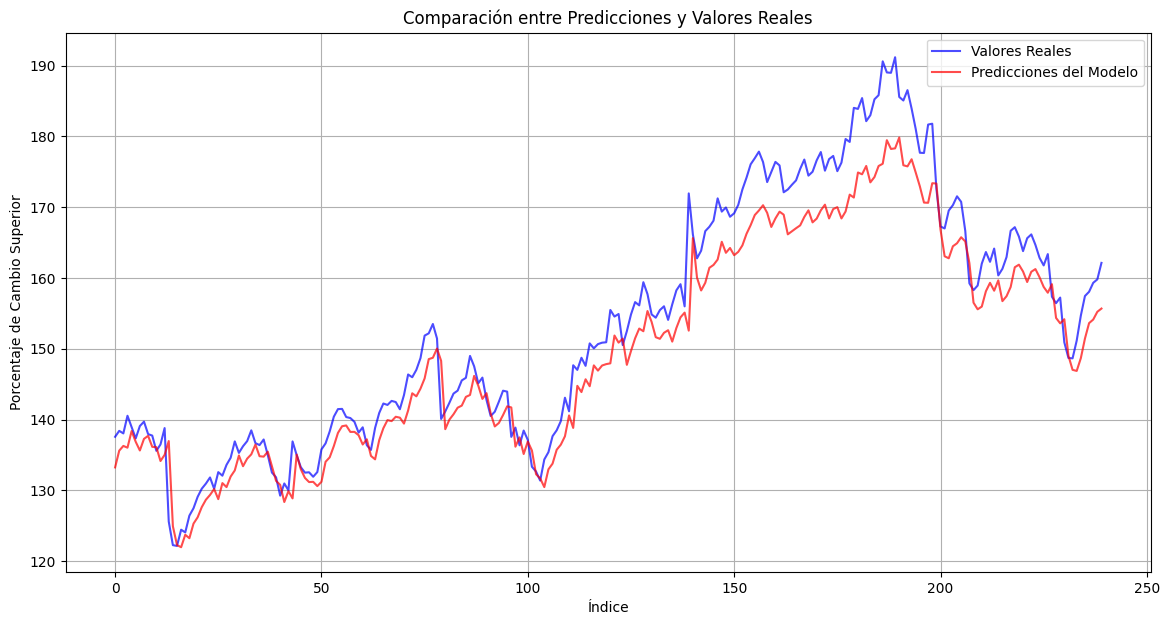

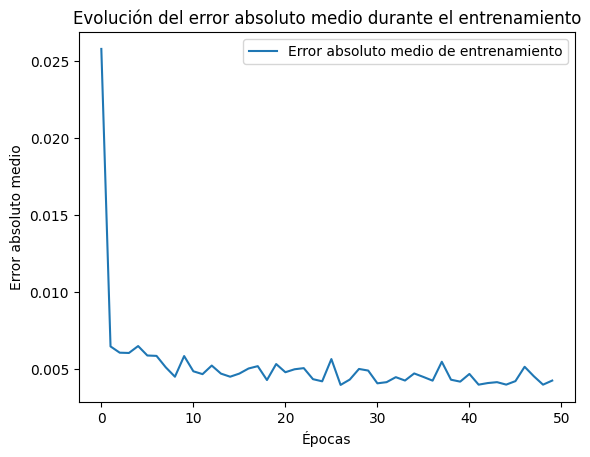

In [42]:
# Evaluar el modelo en el conjunto de prueba
test_loss = model.evaluate(x_test, y_test)
print("perdidas de test", test_loss)
# Predicción
predictions = model.predict(x_test)

# Desescalar las predicciones
predictions = scaler.inverse_transform(predictions)

#Reshape y_test to be a 2D array before inverse_transform
y_test = y_test.reshape(-1, 1)

y_test = scaler.inverse_transform(y_test)

# Calcular métricas adicionales
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

# Mostrar las métricas
print(f"Test Loss (MSE): {test_loss}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

# Crear el gráfico
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='Valores Reales', color='blue', alpha=0.7)
plt.plot(predictions, label='Predicciones del Modelo', color='red', alpha=0.7)
plt.xlabel('Índice')
plt.ylabel('Porcentaje de Cambio Superior')
plt.title('Comparación entre Predicciones y Valores Reales')
plt.legend()
plt.grid(True)
plt.show()

# Graficar la pérdida (MAE)
plt.plot(history.history['loss'], label='Error absoluto medio de entrenamiento')
plt.title('Evolución del error absoluto medio durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Error absoluto medio')
plt.legend()
plt.show()

In [43]:
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_6 (Conv1D)                    │ (None, 256, 32)             │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_3 (Reshape)                  │ (None, 256, 32)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_21 (LSTM)                       │ (None, 64)                  │          24,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 74,885 (292.52 KB)

 Trainable params: 24,961 (97.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 49,924 (195.02 KB)

## GRU (Gated Recurrent Units)

In [44]:
from tensorflow.keras.layers import GRU
time_steps = 128
x_total, y_total = create_lstm_data(close_prices_scaled, time_steps)

dis = int(len(x_total) * 0.95)
display(dis)
x_train, x_test = x_total[:dis], x_total[dis:]
y_train, y_test = y_total[:dis], y_total[dis:]

x = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
model = Sequential()
model.add(GRU(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(GRU(units=50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
history = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_test, y_test))


4681

Epoch 1/30


C:\Python\Python39\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


147/147 ━━━━━━━━━━━━━━━━━━━━ 14s 67ms/step - loss: 0.0080 - mean_absolute_error: 0.0474 - val_loss: 4.5141e-04 - val_mean_absolute_error: 0.0169
Epoch 2/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 9s 61ms/step - loss: 7.1240e-05 - mean_absolute_error: 0.0051 - val_loss: 3.9116e-04 - val_mean_absolute_error: 0.0155
Epoch 3/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - loss: 6.1780e-05 - mean_absolute_error: 0.0045 - val_loss: 3.5353e-04 - val_mean_absolute_error: 0.0147
Epoch 4/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 9s 62ms/step - loss: 6.5276e-05 - mean_absolute_error: 0.0047 - val_loss: 3.0340e-04 - val_mean_absolute_error: 0.0129
Epoch 5/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - loss: 4.9069e-05 - mean_absolute_error: 0.0042 - val_loss: 4.3285e-04 - val_mean_absolute_error: 0.0172
Epoch 6/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - loss: 5.1078e-05 - mean_absolute_error: 0.0045 - val_loss: 3.0038e-04 - val_mean_absolute_error: 0.0135
Epoch 7/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 9s 62ms/step - loss:

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.2729e-04 - mean_absolute_error: 0.0110
perdidas de test [0.00023844122188165784, 0.011614765040576458]
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step
Test Loss (MSE): [0.00023844122188165784, 0.011614765040576458]
Mean Absolute Error (MAE): 2.1914430996667034
Mean Squared Error (MSE): 8.48830123011259
Root Mean Squared Error (RMSE): 2.913468934125193
R-squared (R²): 0.971845506896803


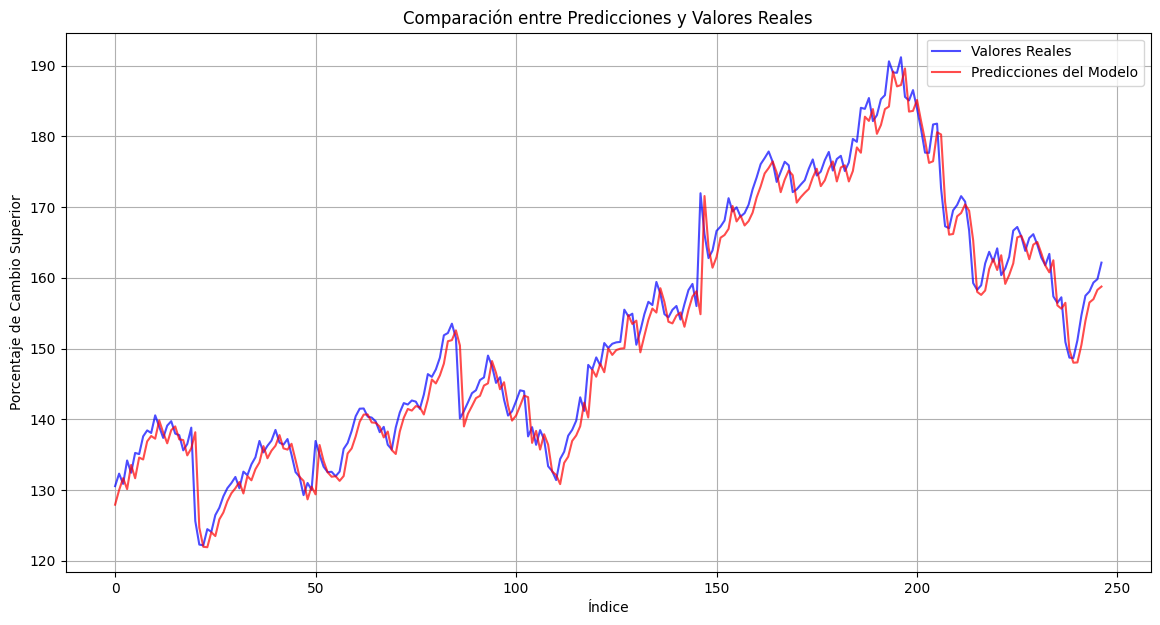

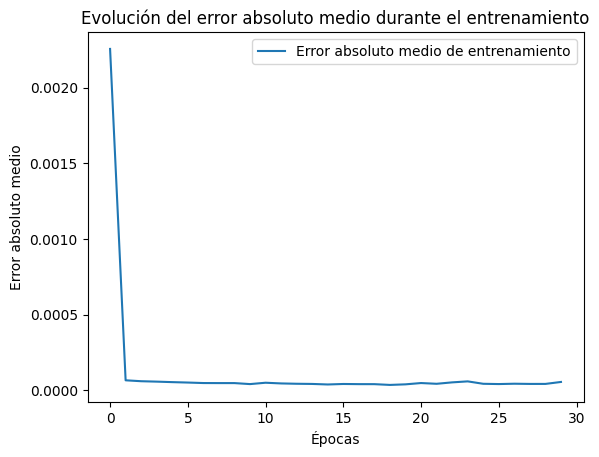

In [45]:
# Evaluar el modelo en el conjunto de prueba
test_loss = model.evaluate(x_test, y_test)
print("perdidas de test", test_loss)
# Predicción
predictions = model.predict(x_test)

# Desescalar las predicciones
predictions = scaler.inverse_transform(predictions)

#Reshape y_test to be a 2D array before inverse_transform
y_test = y_test.reshape(-1, 1)

y_test = scaler.inverse_transform(y_test)

# Calcular métricas adicionales
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

# Mostrar las métricas
print(f"Test Loss (MSE): {test_loss}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

# Crear el gráfico
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='Valores Reales', color='blue', alpha=0.7)
plt.plot(predictions, label='Predicciones del Modelo', color='red', alpha=0.7)
plt.xlabel('Índice')
plt.ylabel('Porcentaje de Cambio Superior')
plt.title('Comparación entre Predicciones y Valores Reales')
plt.legend()
plt.grid(True)
plt.show()

# Graficar la pérdida (MAE)
plt.plot(history.history['loss'], label='Error absoluto medio de entrenamiento')
plt.title('Evolución del error absoluto medio durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Error absoluto medio')
plt.legend()
plt.show()

## GRU (Gated Recurrent Units) + Capa Densa

In [49]:
from tensorflow.keras.layers import GRU
time_steps = 128
x_total, y_total = create_lstm_data(close_prices_scaled, time_steps)

dis = int(len(x_total) * 0.95)
display(dis)
x_train, x_test = x_total[:dis], x_total[dis:]
y_train, y_test = y_total[:dis], y_total[dis:]

x = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
model = Sequential()
model.add(GRU(units=100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(GRU(units=100))
model.add(Dense(units=25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
history = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_test, y_test))


4681

Epoch 1/30


C:\Python\Python39\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


147/147 ━━━━━━━━━━━━━━━━━━━━ 14s 75ms/step - loss: 0.0048 - mean_absolute_error: 0.0375 - val_loss: 4.3795e-04 - val_mean_absolute_error: 0.0168
Epoch 2/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 11s 76ms/step - loss: 6.1423e-05 - mean_absolute_error: 0.0046 - val_loss: 3.6706e-04 - val_mean_absolute_error: 0.0139
Epoch 3/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 11s 75ms/step - loss: 5.5323e-05 - mean_absolute_error: 0.0045 - val_loss: 3.3238e-04 - val_mean_absolute_error: 0.0140
Epoch 4/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 11s 76ms/step - loss: 6.5363e-05 - mean_absolute_error: 0.0051 - val_loss: 3.7767e-04 - val_mean_absolute_error: 0.0157
Epoch 5/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 11s 74ms/step - loss: 4.8052e-05 - mean_absolute_error: 0.0041 - val_loss: 3.7090e-04 - val_mean_absolute_error: 0.0135
Epoch 6/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 11s 75ms/step - loss: 5.6609e-05 - mean_absolute_error: 0.0047 - val_loss: 2.8011e-04 - val_mean_absolute_error: 0.0117
Epoch 7/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 11s 74ms/step -

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 2.0847e-04 - mean_absolute_error: 0.0094
perdidas de test [0.00021644086518790573, 0.009853857569396496]
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step
Test Loss (MSE): [0.00021644086518790573, 0.009853857569396496]
Mean Absolute Error (MAE): 1.8591978559609847
Mean Squared Error (MSE): 7.705098248528728
Root Mean Squared Error (RMSE): 2.775805873711043
R-squared (R²): 0.9744432802728444


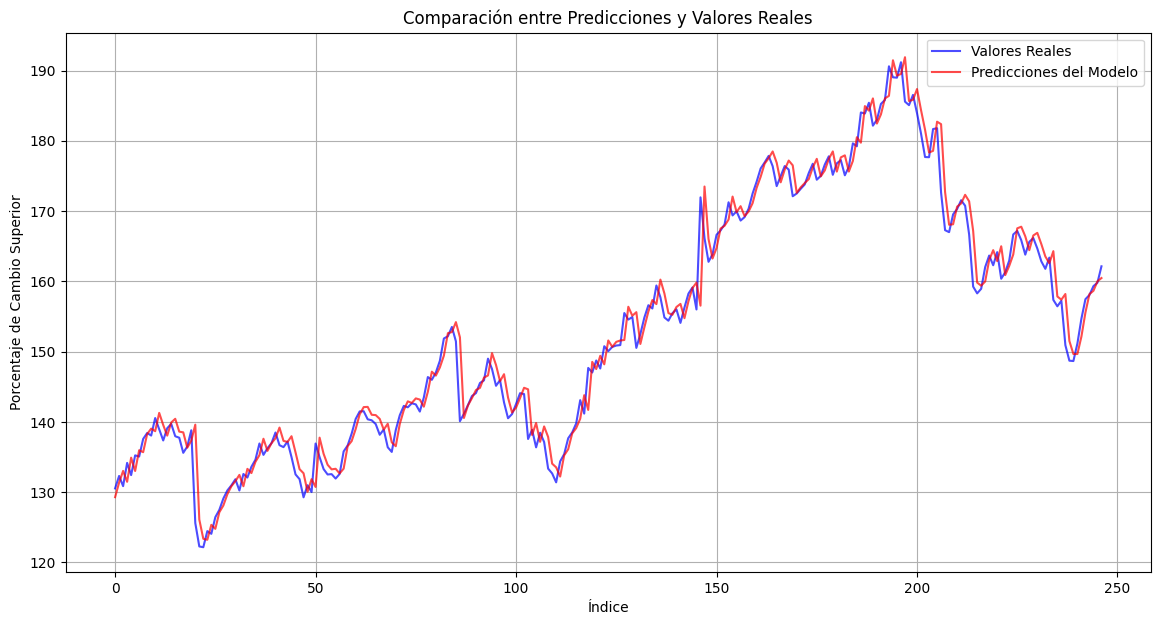

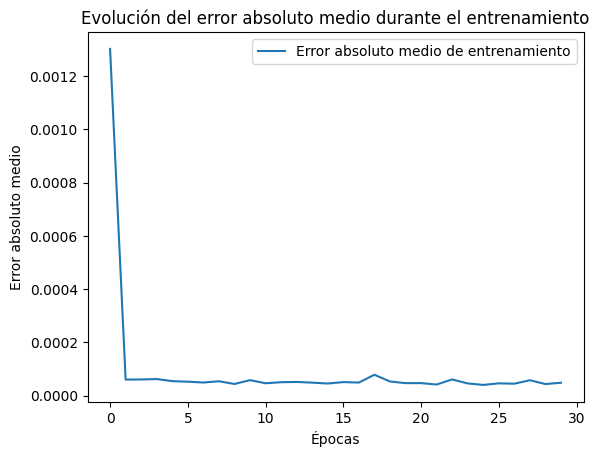

In [50]:
# Evaluar el modelo en el conjunto de prueba
test_loss = model.evaluate(x_test, y_test)
print("perdidas de test", test_loss)
# Predicción
predictions = model.predict(x_test)

# Desescalar las predicciones
predictions = scaler.inverse_transform(predictions)

#Reshape y_test to be a 2D array before inverse_transform
y_test = y_test.reshape(-1, 1)

y_test = scaler.inverse_transform(y_test)

# Calcular métricas adicionales
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

# Mostrar las métricas
print(f"Test Loss (MSE): {test_loss}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

# Crear el gráfico
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='Valores Reales', color='blue', alpha=0.7)
plt.plot(predictions, label='Predicciones del Modelo', color='red', alpha=0.7)
plt.xlabel('Índice')
plt.ylabel('Porcentaje de Cambio Superior')
plt.title('Comparación entre Predicciones y Valores Reales')
plt.legend()
plt.grid(True)
plt.show()

# Graficar la pérdida (MAE)
plt.plot(history.history['loss'], label='Error absoluto medio de entrenamiento')
plt.title('Evolución del error absoluto medio durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Error absoluto medio')
plt.legend()
plt.show()

In [51]:
model.summary()


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_4 (GRU)                          │ (None, 128, 100)            │          30,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_5 (GRU)                          │ (None, 100)                 │          60,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 25)                  │           2,525 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 282,155 (1.08 MB)

 Trainable params: 94,051 (367.39 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 188,104 (734.79 KB)